In [96]:
# Работа с данными
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-dataset/dataset.csv


In [97]:
# Считываем данные
df = pd.read_csv('/kaggle/input/spotify-dataset/dataset.csv')

In [98]:
# Смотрим данные
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [99]:
# Удалим ненужный столбец
df = df.drop(columns=['Unnamed: 0'])

In [100]:
# Посмотрим на данные в общем виде
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

**Описание каждого из свойств датасета:**

1. **track_id** — Уникальный идентификатр трека.
2. **artists** — Имя или список имен исполнителей трека.
3. **album_name** — Название альбома, в котором содержится трек. Может повторяться для треков из одного альбома.
4. **track_name** — Название трека. Может совпадать для разных исполнителей, но в сочетании с track_id уникален.
5. **popularity** — Метрика популярности трека в Spotify (0-100).
6. **duration_ms** — Продолжительность трека в миллисекундах.
7. **explicit** — Логическое значение, указывающее, содержит ли трек ненормативную лексику. True — содержит, False — не  .содержит
8. **danceability** — Оценка, насколько трек подходит для танцев (0-1).
9. **energy** — Энергия трека (0-1). Высокие значения отражают быстрые и громкие треки.
10. **key** — Музыкальная тональ.ность трека
11. **loudness** — Средняя гро.мкость трека
12. **mode** — Тип гаммы: 0 — минор, 1 — мажор.
13. **speechiness** — Доля слов в треке (0-1). Более высокие значения характерны для речевых треков, таких как рэп.
14. **acousticness** — Вероятность того, что трек является аку.стическим (0-1)
15. **instrumentalness** — Доля трека, которая является инструментальной (0-1). Значения ближе к 1 означают полное отсутствие вокала.
16. **liveness** — Вероятность того, что трек записан вживую (0-1). Более высокие значения характерны для живых выступлений.
17. **valence** — Оценка эмоциональной окраски трека (0-1). Высокие значения указывают на более позитивное настроение.
18. **tempo** — Характеризует скорость композиции.
19. **time_signat.ure** — Размер такта
20. **track_genre** — Жанр трека.

In [101]:
# Проверим наличие null значений
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [102]:
# Удалим null значения, так как их не так много
df = df.dropna()

# Аналитика

# График №1 — Общее распределение популярности треков


Для начала я решила посмотреть на общую картину популярности треков. Построила график количества треков в определенных диапазонах популярности. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


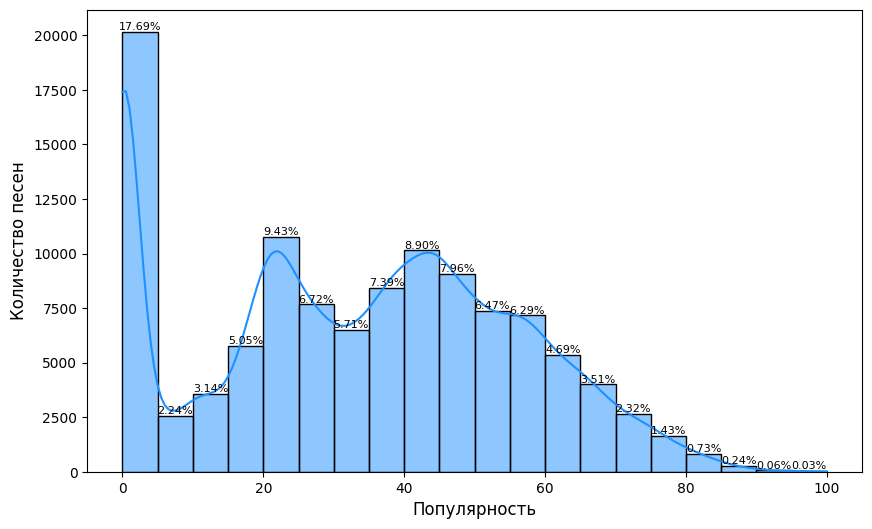

In [103]:
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=df, x='popularity', kde=True, bins=20, color="dodgerblue")

total_songs_count = len(df)

# Добавляем проценты над столбцами
for p in histplot.patches:
    y_position = p.get_height()
    percentage = (y_position / total_songs_count) * 100
    x_position = p.get_x() + p.get_width() / 2
    plt.text(x_position, y_position, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8, color='black')

plt.xlabel("Популярность", fontsize=12)
plt.ylabel("Количество песен", fontsize=12)
plt.show()

***Вывод по графику:***

* Большое число песен абсолютно не пользовались популярностью. Это видно по выбросу в диапазоне популярности от 0 до 5.
* Далее по графику видна тенденция в росте количества более популярных треков. Затем график выходит на плато с некоторыми флуктуациями, после чего количество треков с высоким индексом популярности снижается. Выходит, что количество хитов сравнительно мало.
* Стоит выяснить, что именно влияет на высокую популярность трека, проверив влияние свойств трека на этот параметр

# График №2 — Распределение танцевальности, громкости и энергичности

Посмотрим на общую картину распределения ***danceability***, ***energy*** и ***valence***. Так как их диапазон значений лежит в диапазоне от 0 до 1, то рассмотрим их на одном графике. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


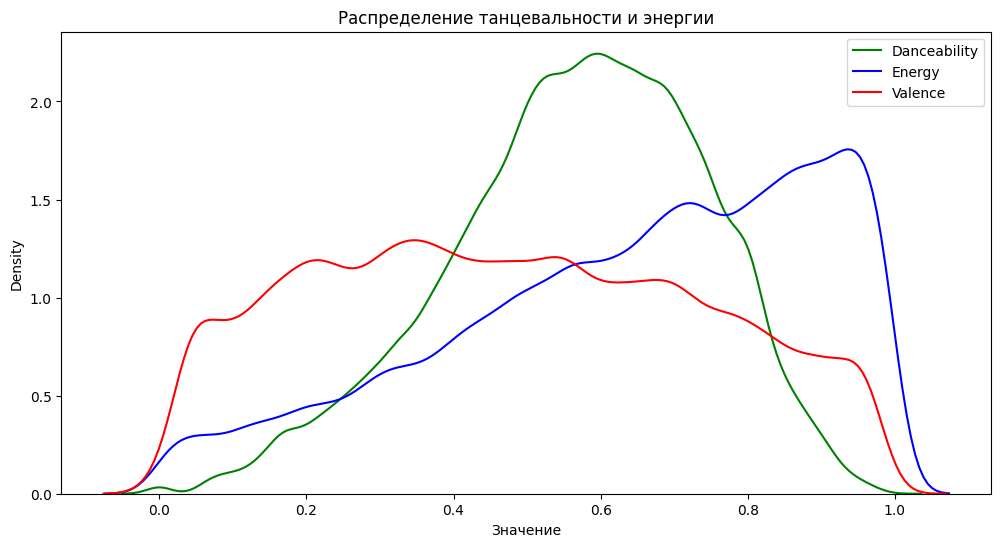

In [104]:
# Распределение танцевальности, энергичности и громкости
plt.figure(figsize=(12, 6))
sns.kdeplot(df['danceability'], color='green', label='Danceability')
sns.kdeplot(df['energy'], color='blue', label='Energy')
sns.kdeplot(df['valence'], color='red', label='Valence')
plt.title('Распределение танцевальности и энергии')
plt.xlabel('Значение')
plt.legend()
plt.show()

***Вывод:*** 
* *danceability:* преобладают треки со средней танцевальностью.
* *energy:* преобладают треки с высокой энергичностью.
* *valence:* треки равномерно распределены относительно эмоциональной окраски.

# График №3 — Средняя популярность песен в зависимости от наличия ненормативной лексики

Для начала стоит выяснить количественное и процентное соотношение треков ***с ненормативной лексикой*** и ***без ненормативной лексики***

In [105]:
explicit_counts = df['explicit'].value_counts()
explicit_true = explicit_counts.iloc[0]
explicit_false = explicit_counts.iloc[1]
print(f'Количество треков без ненормативной лексики: {explicit_true} ({explicit_true / len(df) * 100 :.2f}%)')
print(f'Количество треков с ненормативной лексикой: {explicit_false} ({explicit_false / len(df) * 100 :.2f}%)')

Количество треков без ненормативной лексики: 104252 (91.45%)
Количество треков с ненормативной лексикой: 9747 (8.55%)


***Вывод:*** Количество треков ***без ненормативной лексики значительно превышает*** количество треков с ненормативной лексикой. Стоит проверить, влияет ли наличие ненормативной лексики на популряность трека.

Построим ***диаграмму средней популярности трека в зависимости от наличия ненормативной лексики***


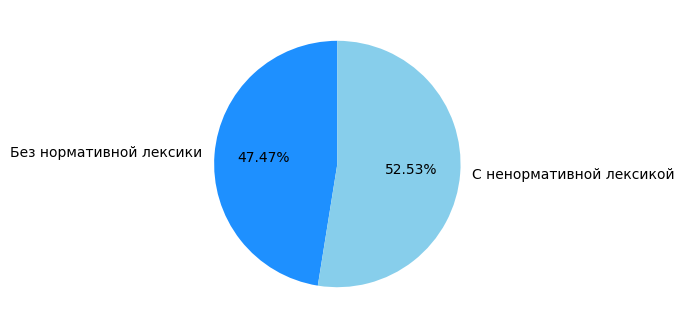

In [106]:
# Группируем по столбцу explicit и рассчитываем среднюю популярность внутри группы
explicit_popularity = df.groupby('explicit')['popularity'].mean()

plt.figure(figsize=(4, 4))
plt.pie(explicit_popularity, labels=['Без нормативной лексики', 'С ненормативной лексикой'], autopct='%.2f%%', startangle=90, colors=['dodgerblue', 'skyblue'])
plt.show()

***Вывод:*** Треки, в которых присутствует ***ненормативная лексика***, в среднем имеют ***большую популярность***. Но, так как разброс в количественном соотношении треков ***с*** и ***без*** ненормативной лексики велик, то, наверное, неккоректно делать выводы относительно влияния свойства *explicit* на популярность.

# График №4 — Влияние длительности трека на популярность

Так как нам привычнее воспринимать продолжительность трека в минутах, а не милисекундах, то переведём длительность треков из одной величины в другую для удобства.

In [107]:
# Переводим длительность в миллисекундах в минуты
df['duration_min'] = df['duration_ms'] / 60000

In [108]:
# Распределим продолжительность треков по нескольким основным диапазонам и дадим им названия
bins = [0, 1, 2, 3, 4, 5, 10, df['duration_min'].max()]
labels = ['<1 мин', '1-2 мин', '2-3 мин', '3-4 мин', '4-5 мин', '5-10 мин', '>10 мин']

# Найдем диапазон с наибольшим количеством, входящих в него треков
duration_counts = df['duration_min'].value_counts(bins=bins)
print(duration_counts)

(3.0, 4.0]        42384
(2.0, 3.0]        26136
(4.0, 5.0]        22832
(5.0, 10.0]       15745
(1.0, 2.0]         5427
(-0.001, 1.0]       872
(10.0, 87.288]      603
Name: count, dtype: int64


***Вывод:*** Наиболее частая продолжительность треков находится в диапазоне ***от 3 до 4 минут***. Стоит проверить, влияет ли продолжительность трека на его популярность

Построим ***график влияния длительности трека на популярность***

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


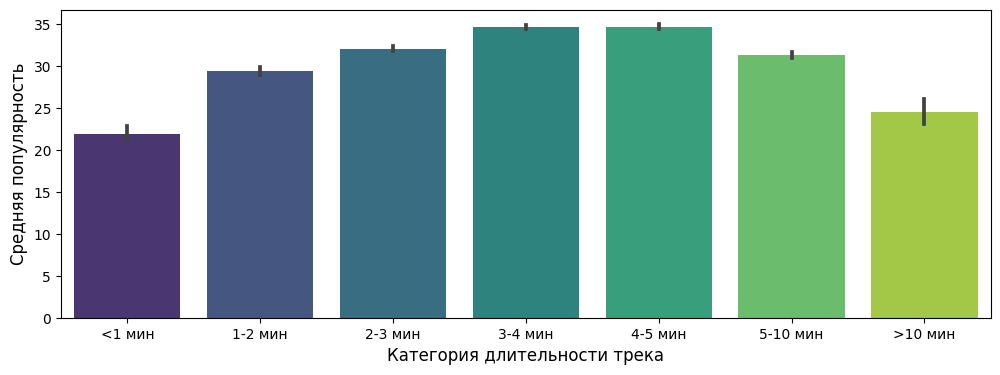

In [109]:
# Разделим длительности на категории
df['duration_category'] = pd.cut(df['duration_min'], bins=bins, labels=labels)

plt.figure(figsize=(12, 4))
sns.barplot(data=df, x='duration_category', y='popularity', palette='viridis')

plt.xlabel('Категория длительности трека', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.show()

***Вывод:*** Длительность наиболее популярных треков лежит в диапазоне ***от 3 до 4 минут***. Этот диапазон также является диапазоном, в который входит наибольшее число треков. Можно предположить, что длительность трека может влиять на популярность.

# График №5 — Зависимость популярности от жанра

Определим количественное соотношение треков по жанрам, чтобы понять, насколько равномерно распределены данные.

In [110]:
# Найдем количество треков для каждого жанра
track_genre_counts = df['track_genre'].value_counts()
print(track_genre_counts)

track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: count, Length: 114, dtype: int64


In [111]:
unique_counts = set(list(track_genre_counts.values))
print(f"Уникальные количества треков внутри каждого жанра: {unique_counts}")

Уникальные количества треков внутри каждого жанра: {1000, 999}


***Вывод:*** На каждый жанр приходится по ***1000 треков***, данные распределены равномерно.

Построим ***график 5 самых популярных жанров***

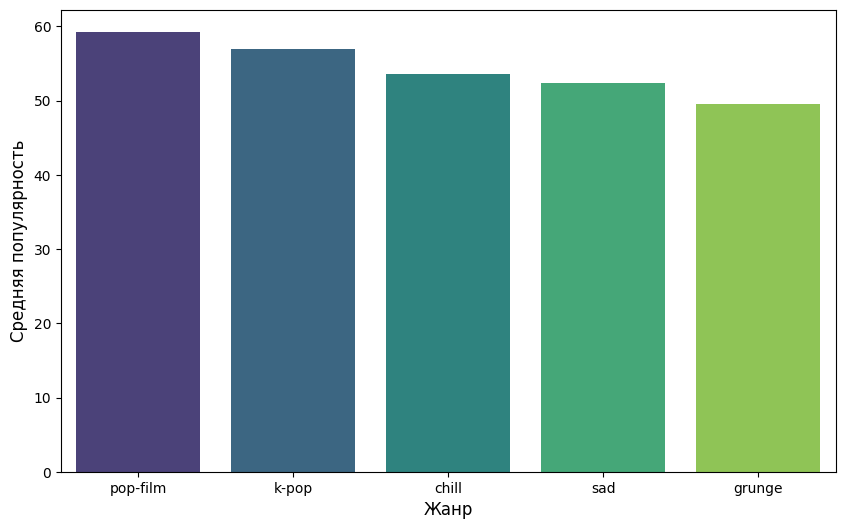

In [112]:
# Выбираем 5 самых популярных жанров
top_10_genres = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='viridis')

plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.show()

***Вывод:*** Как такового вывода из этого графика сделать нельзя. Но можно посмотреть, какие свойства характерны для этих 5 самых популярных жанров *(pop-film, k-pop, chill, sad, grunge)* и проверить их влияние на популярность.

# График №6 — Выявление признаков, характерных для наиболее популярных жанров
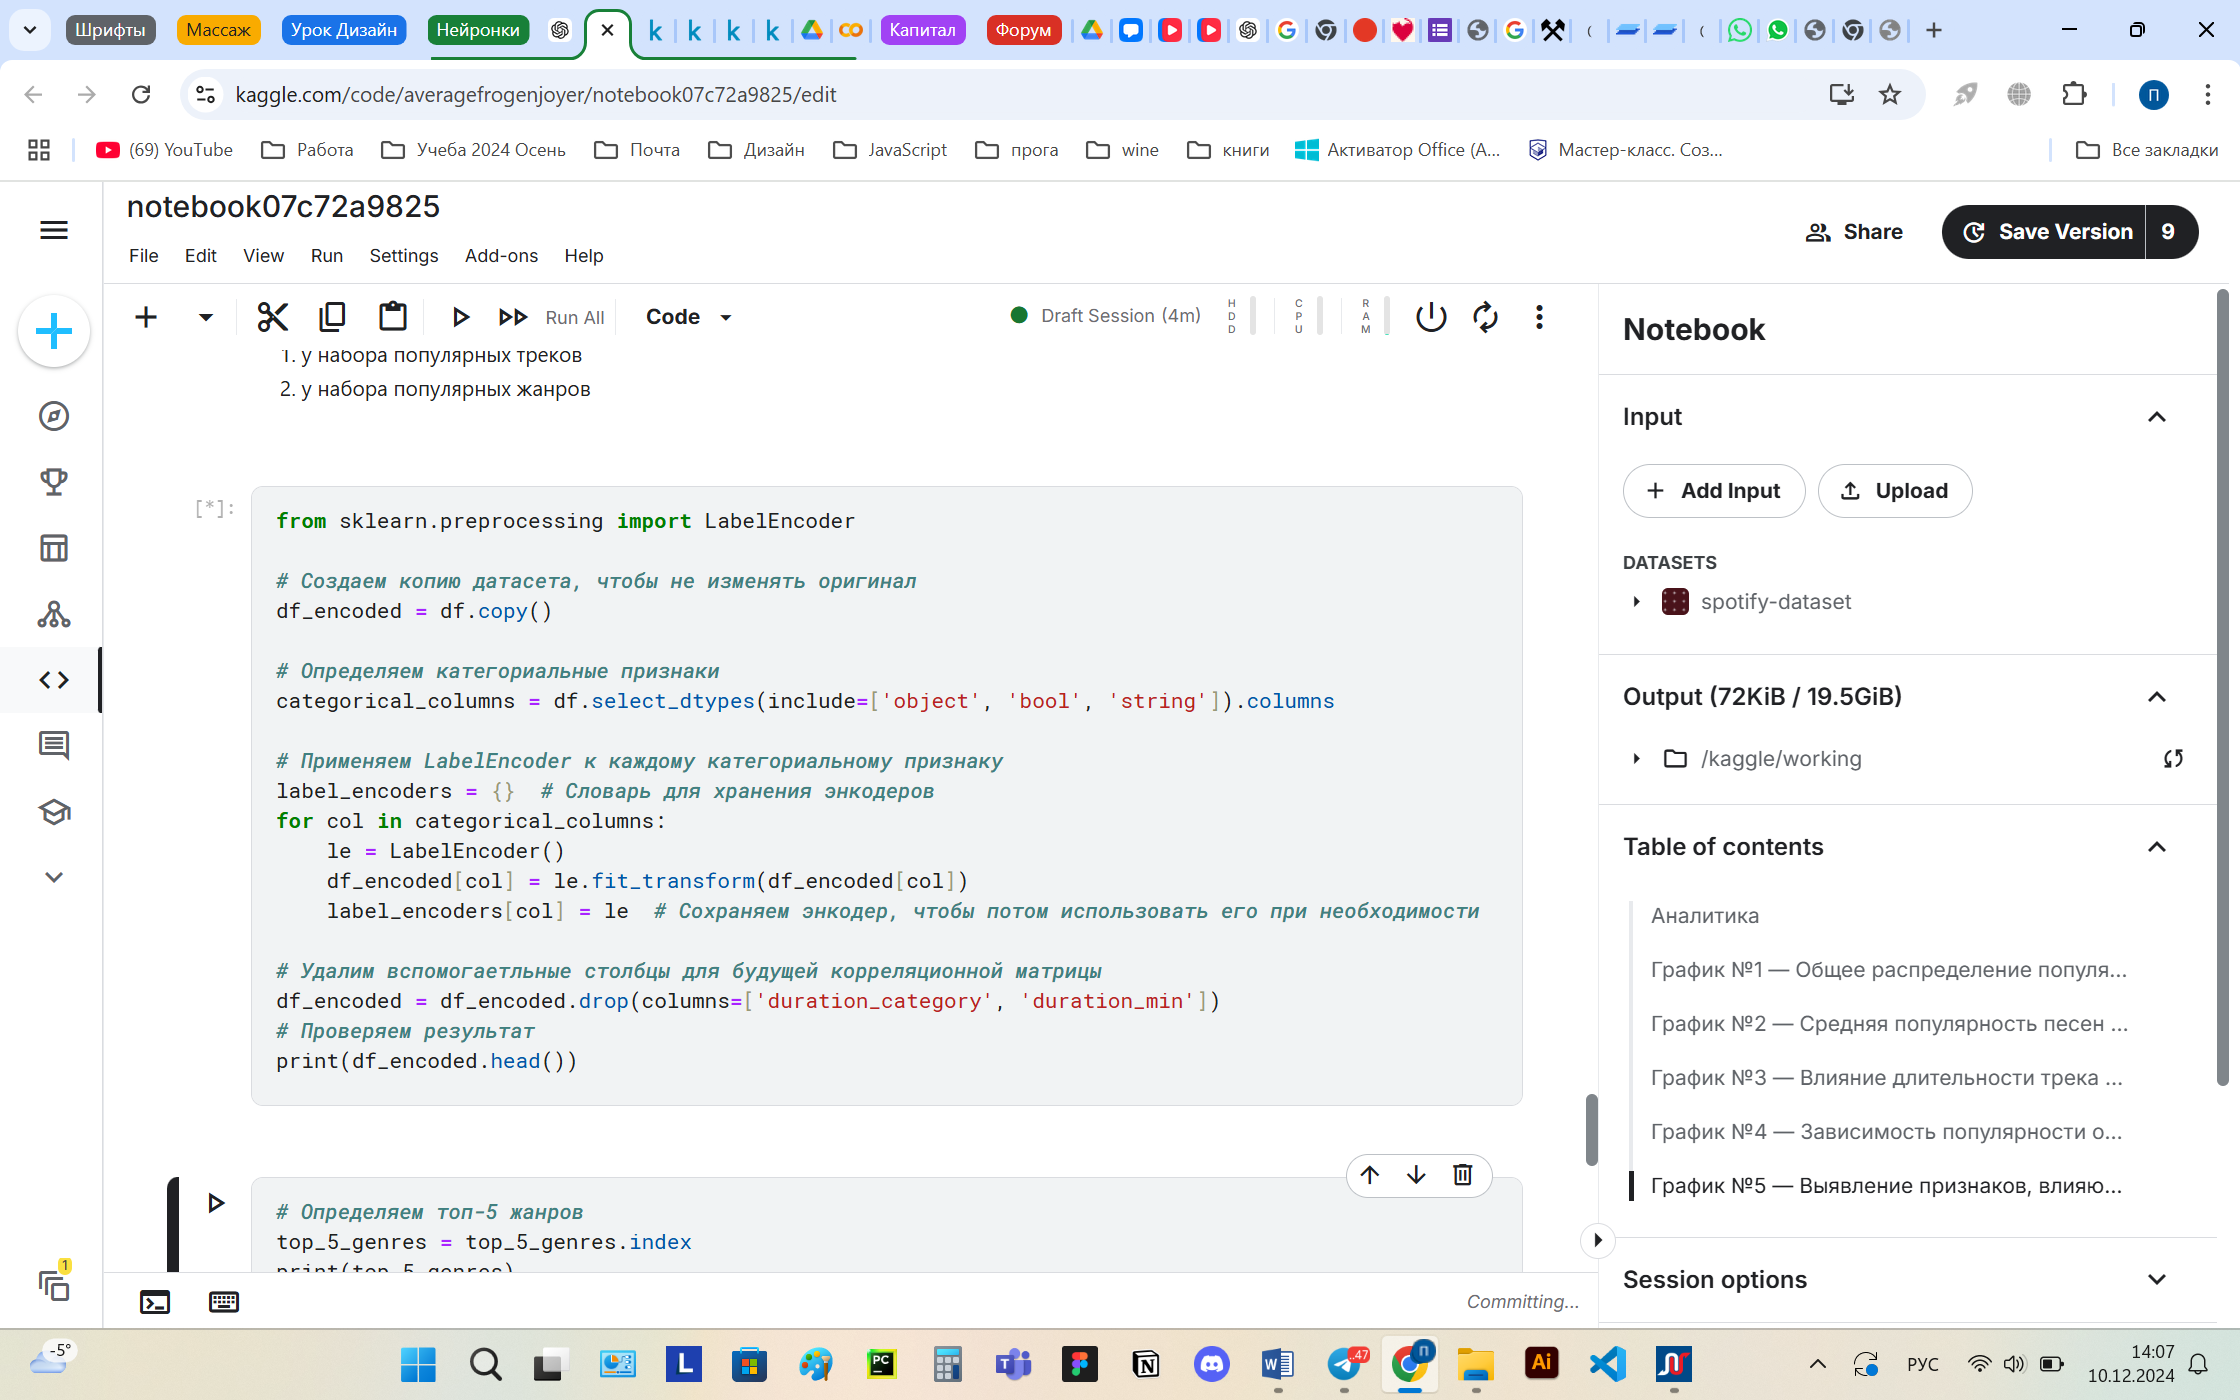

Мне кажется, есть несколько способов определить признаки, влияющие  на популярность:
1. через набор **популярных треков**
2. через набор **популярных жанров**

Я буду выявлять признаки, определяющие популярность, через оба способа с надеждой выявить корреляции популярности с какими-нибудь из признаков.

In [113]:
from sklearn.preprocessing import LabelEncoder

# Создаем копию датасета, чтобы не изменять оригинал
df_encoded = df.copy()

# Определяем категориальные признаки
categorical_columns = df.select_dtypes(include=['object', 'bool', 'category']).columns

# Применяем LabelEncoder к каждому категориальному признаку
label_encoders = {} 
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Сохраняем энкодер, чтобы потом использовать его при необходимости

# Проверяем результат
print(df_encoded.head())

   track_id  artists  album_name  track_name  popularity  duration_ms  \
0     62845    10357        8100       11741          73       230666   
1     55667     3287       14796       22528          55       149610   
2     19766    12397       39162       60774          57       210826   
3     77941    14839        8580        9580          71       201933   
4     68241     5255       16899       25689          82       198853   

   explicit  danceability  energy  key  ...  speechiness  acousticness  \
0         0         0.676  0.4610    1  ...       0.1430        0.0322   
1         0         0.420  0.1660    1  ...       0.0763        0.9240   
2         0         0.438  0.3590    0  ...       0.0557        0.2100   
3         0         0.266  0.0596    0  ...       0.0363        0.9050   
4         0         0.618  0.4430    2  ...       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  \
0          0.000001    0.3580    0.7

Построим корреляционную матрицу для **всего датасета**

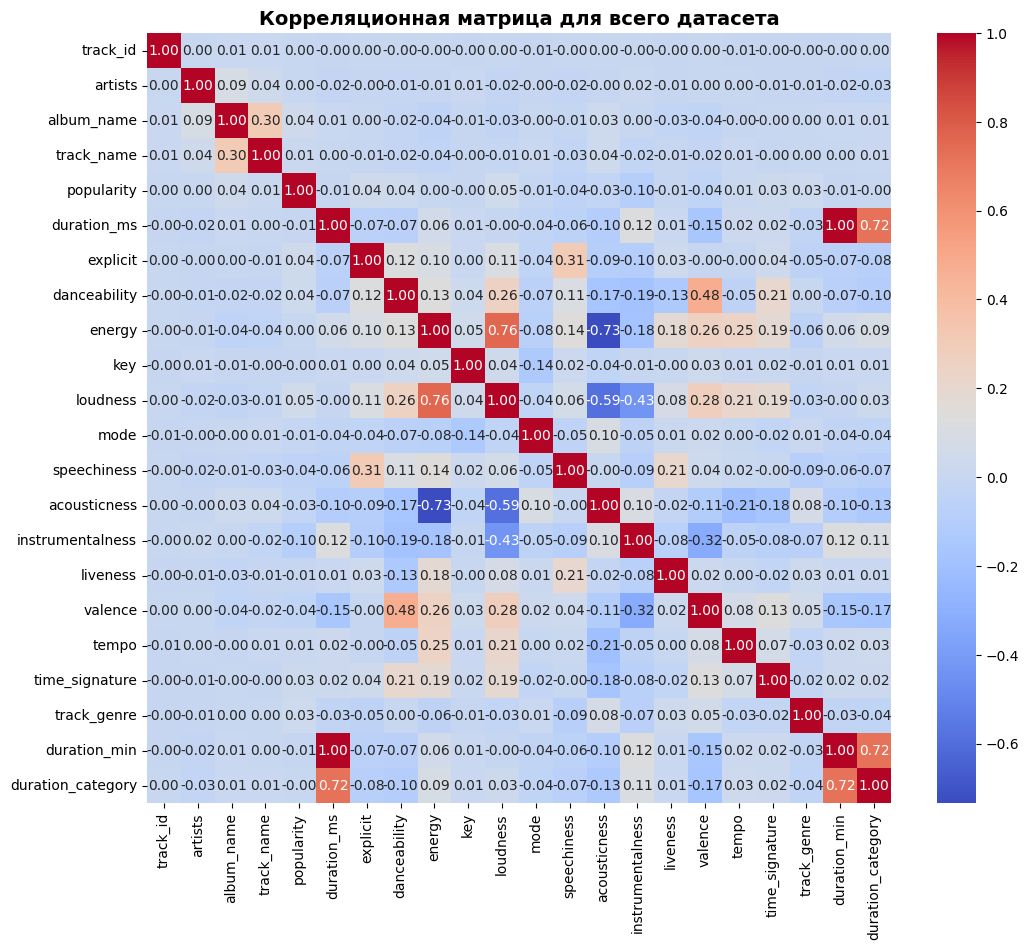

In [114]:
# Вычисляем корреляционную матрицу
corr_matrix = df_encoded.corr()

# Настройка графика
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляционная матрица для всего датасета", fontsize=14, weight='bold')
plt.show()

***Вывод:*** 
* Ярко выраженной корреляции популярности по какому либо признаку не выявилось.
* *energy* и *loudness* имеют сильную положительную корреляцию 
* *danceability* имеет среднюю положительную корреляцию с *loudness* и *valence*
* *acousticness* имеет сильную отрицательную корреляцию с *energy* и *loudness* 

Найдем корреляционную матрицу для ***5 самых популярных жанров***. Этот способ может помочь выявить закономерность благодяра нескольким гипотезам:
1. Для каждого жанра равномерно распределено количество треков, значит средняя популяhность устойчива к колебаниям.
2. Каждый жанр имеет отличительные черты, объединяющие треки, которые относятся к этому жанру.

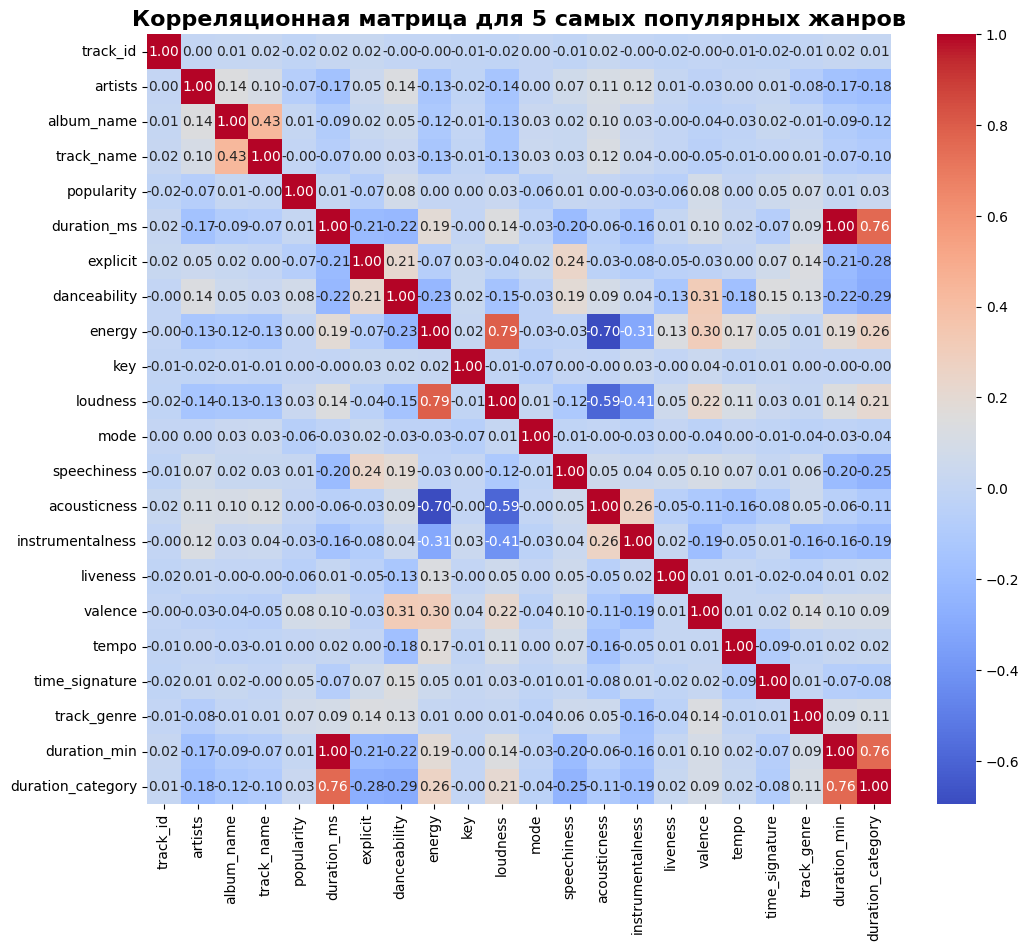

In [115]:
# Найдем 5 самых популярных жанров
top_5_genres_df = df_encoded.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(5)

# Фильтруем датафрейм по 5 самым популярным жанрам
top_5_genres_filtered = df_encoded[df_encoded['track_genre'].isin(top_5_genres_df.index)]

# Вычисляем корреляционную матрицу
top_5_genres_corr = top_5_genres_filtered.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_5_genres_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляционная матрица для 5 самых популярных жанров", fontsize=16, weight='bold')
plt.show()

***Вывод:*** 
* Ярко выраженной корреляции популярности по какому либо признаку не выявилось. Наибольшую корреляцию имеют *danceability* и *valence* и она равна 0.8
* *energy* и *loudness* имеют сильную положительную корреляцию.
* В сравнении с матрицей по всему датасету, *loudness* и *danceability* имеют отрицательную корреляцию вместо положительной.
* *valence* имеет среднюю положительную корреляцию с *loudness*, *danceability* и *energy*
* *acousticness* имеет сильную отрицательную корреляцию с *energy* и *loudness*

Найдем корреляционную матрицу для треков, чья ***популярность не меньше 70***. Исходя из жизненного опыта, можно предположить, что популярными становятся треки, которые "заедают" в голове. За это могут отвечать некоторые определенные признаки, которые можно попытаться выявить.

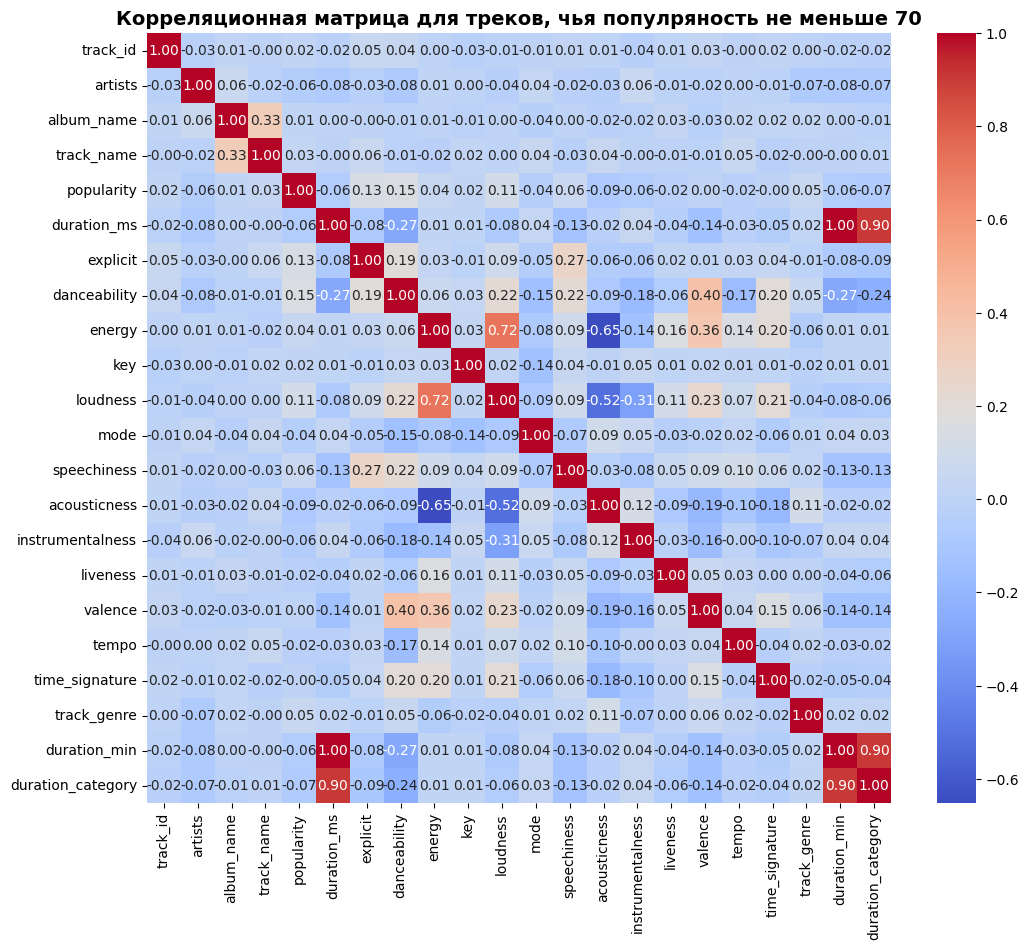

In [116]:
# Сортируем датафрейм в порядке убывания и находим треки, чья популярность не меньше 70
top_tracks_df = df_encoded[df_encoded['popularity'] >= 70].sort_values(by='popularity', ascending=False)

# Вычисляем корреляционную матрицу
top_tracks_corr = top_tracks_df.corr()

# Настройка графика
plt.figure(figsize=(12, 10))
sns.heatmap(top_tracks_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляционная матрица для треков, чья популряность не меньше 70", fontsize=14, weight='bold')
plt.show()


***Вывод:*** 
* Ярко выраженной корреляции популярности с каким либо признаком не выявилось. Наибольшую корреляцию имеют *danceability* и *explicit* и она равна 0.15 и 0.11 соответственно
* *energy* и *loudness* имеют сильную положительную корреляцию.
* *valence* имеет среднюю положительную корреляцию с *loudness*, *danceability* и *energy*
* *acousticness* имеет сильную отрицательную корреляцию с *energy* и *loudness*
* Выводы по этой матрице схожи с выводами по матрице всего датасета

***Общий вывод:***

* *energy* и *loudness* сильно коррелируют друг с другом, поэтому можно создать общий признак на их основе
* можно создать общий признак на основе *valence + loudness/danceability/energy* из-за их положительной корреляции друг с другом
* создать признак, в котором будет записано, является трек синглом или частью альбома
* сильно корреляции популярности с каким либо признаком не обнаружено

# Feature Engeneering

Создадим новое свойство, в котором будем записывать, является ли трек синглом или был выпущен в составе альбома. Возможно, на популярность может влиять этот параметр и это поможет улучшить метрики.

In [117]:
# Создаем новый столбец "is_single"
df['is_single'] = df['album_name'].map(df['album_name'].value_counts()) == 1

# Преобразуем булевый столбец в понятное обозначение
df['is_single'] = df['is_single'].replace({True: 'Single', False: 'Album'})


Так как energy и loudness сильно коррелируют друг с другом, то можно объединить их в один признак.

In [118]:
# Создаем новый признак, обобщающий энергичность и громкость
df['energy_loudness_ration'] = df['energy'] * df['loudness']

Также можно создать новый признак на основе акустичности и инструментальности, который покажет, к какому из этих полюсов трек тяготеет больше.

In [119]:
# Создаем новый признак с отношением акустичности к инструментальности
df['acoustic_to_instrumental_ratio'] = df['acousticness'] / (df['instrumentalness'] + 1e-6)

Этот признак будет показывать уровень оптимизма и танцевальности трека одновременно, так как они неплохо коррелируют между собой. Если оба значения высоки, то результат будет тоже высоким, что может отражать радостные и танцевальные треки.

In [120]:
# Создаем новый признак на основе danceability/energy и valence
df['dance_valence_ratio'] = df['danceability'] * df['valence']
df['energy_valence_ratio'] = df['energy'] * df['valence']

Создадим признак, определяющий количество выпущенных треков у каждого артиста.

In [121]:
# Создадим признак частоты релизов треков по артисту
df['tracks_per_artist'] = df.groupby('artists')['track_id'].transform('count')

Разобьем энергичность и танцевальность на категории.

In [122]:
df['energy_category'] = pd.qcut(df['energy'], q=3, labels=['Низкая', 'Средняя', 'Высокая'])
df['energy_category'] = pd.qcut(df['danceability'], q=3, labels=['Низкая', 'Средняя', 'Высокая'])

# Обучение моделей

Снова обработаем категориальные признаки, появившиеся после этапа feature engeneering

In [123]:
from sklearn.preprocessing import LabelEncoder

# Создаем копию датасета, чтобы не изменять оригинал
df_encoded = df.copy()

# Определяем категориальные признаки
categorical_columns = df.select_dtypes(include=['object', 'bool', 'category']).columns

# Применяем LabelEncoder к каждому категориальному признаку
label_encoders = {} 
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Сохраняем энкодер, чтобы потом использовать его при необходимости

In [124]:
# Разделение данных на обучающую и тестовую выборки
X = df_encoded.drop(columns=['popularity'])  # измените на ваш целевой признак, если необходимо
y = df_encoded['popularity']  # измените на ваш целевой признак, если необходимо
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# №1 — Нейронная модель (лучшие результаты)

In [125]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 549.2572 - val_loss: 450.0373
Epoch 2/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 461.3097 - val_loss: 441.8462
Epoch 3/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 449.1623 - val_loss: 440.6714
Epoch 4/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 438.8506 - val_loss: 444.4026
Epoch 5/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 434.0913 - val_loss: 418.6239
Epoch 6/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 427.0111 - val_loss: 407.9042
Epoch 7/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 418.6291 - val_loss: 408.4928
Epoch 8/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 407.5216 - val_loss: 402.6536
Epoch 9/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 407.8921 - val_loss: 395.0527
Epoch 10/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 403.0642 - val_loss: 395.5639
Epoch 11/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 400.7054 - val_loss: 389.28

***Лучший результат:*** Test Loss: 371.5599060058594

In [126]:
from sklearn.metrics import mean_absolute_percentage_error

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mape * 100

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MSE: 363.2648784243509
MAE: 15.088661628919736
RMSE: 19.059508871541023
MAPE: 1.4484189035136975e+18


Данная модель показала наилучшие результаты среди остальных. Кросс валидация и измерение важности признаков будет проводиться именно для нее.

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

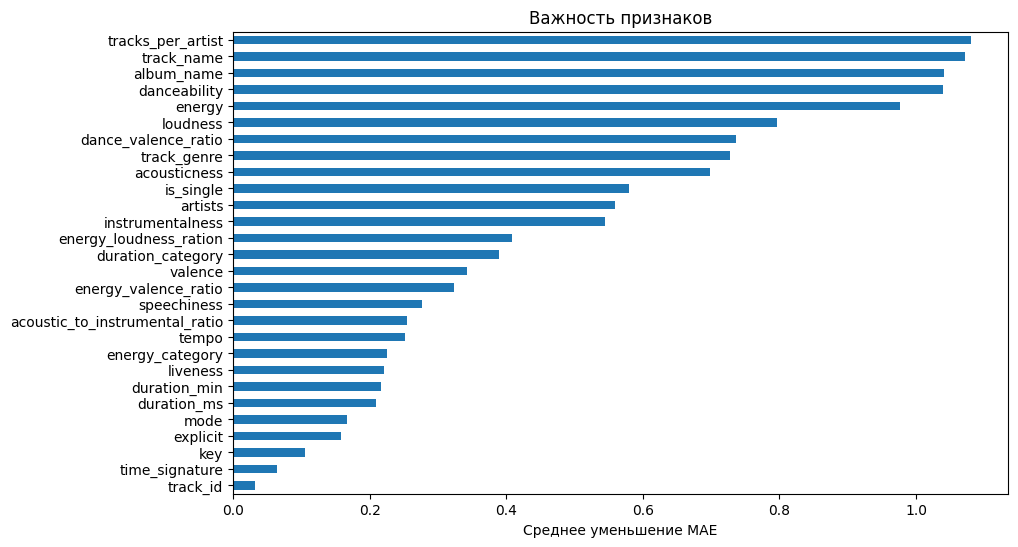

In [127]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

***Наиболее важные признаки:***
1. tracks_per_artist (созданный)
2. track_name
3. album_name
4. danceability
5. energy
6. loudness

***Наименее важные:***
1. track_id
2. time_signature
3. key
4. explicit
5. mode

# №2 — Linear Regression

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mape * 100

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MSE: 471.0353920400663
MAE: 18.1176809498616
RMSE: 21.703349788455842
MAPE: 2.0203141309746335e+18


# №3 — Random Forest Regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Обучение RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания
y_pred_rf = rf_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mape * 100

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')


MSE: 471.0353920400663
MAE: 18.1176809498616
RMSE: 21.703349788455842
MAPE: 2.0203141309746335e+18


# №4 — Gradient Boosting Regressor

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Градиентный бустинг регрессор
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Обучение модели
gbr_model.fit(X_train, y_train)

# Предсказания
y_pred = gbr_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mape * 100

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')


MSE: 377.0190762591622
MAE: 15.755578436267474
RMSE: 19.416979071399396
MAPE: 1.7228095937502213e+18


# Кросс-валидация модели с наилучшими показателями

In [131]:
from sklearn.model_selection import KFold

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Список для хранения значений loss по каждому фолду
losses = []

# Цикл по каждому фолду
for fold_number, (train_index, val_index) in enumerate(kf.split(X_train), 1):
    print(f'Fold №{fold_number}')

    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.to_numpy()[train_index], y_train.to_numpy()[val_index]

    # Создание модели
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])

    # Компиляция модели
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Обучение модели
    model.fit(
        X_train_fold, y_train_fold,
        epochs=20,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
    )

    # Оценка на валидационной выборке
    final_loss = model.evaluate(X_val_fold, y_val_fold)
    losses.append(final_loss)
    print(f'Loss for fold №{fold_number}: {final_loss}')

# Средний loss по всем фолдам
mean_loss = np.mean(losses)
print(f'\nAverage Loss across all folds: {mean_loss}')


Fold №1
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 563.9636 - val_loss: 455.7408
Epoch 2/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 465.0117 - val_loss: 439.5899
Epoch 3/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 456.8207 - val_loss: 430.8587
Epoch 4/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 444.0604 - val_loss: 420.5346
Epoch 5/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 436.6473 - val_loss: 417.3906
Epoch 6/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 428.0492 - val_loss: 411.9332
Epoch 7/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 425.1152 - val_loss: 414.4185
Epoch 8/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 420.4832 - val_loss: 402.0209
Epoch 9/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 413.7743 - val_loss: 397.3700
Epoch 10/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 410.6118 - val_loss: 393.4531
Epoch 11/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 408.0139 - val_loss: 390.83

***Лучшее значение:*** Average Loss across all folds: 372.4548095703125